In [7]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, classification_report

# Load the dataset
data = pd.read_csv('C:/Users/Suhas Raghavendra R/OneDrive/Desktop/dataset/TCGA_InfoWithGrade.csv')  # Ensure the correct path is used

# Prepare the data
X = data.drop('Grade', axis=1)
y = data['Grade']

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize the models
models = {
   "Logistic Regression": LogisticRegression(random_state=42),
   "Random Forest": RandomForestClassifier(random_state=42),
   "SVM": SVC(random_state=42)
}

# Dictionary to store results
results = {}

# Train and evaluate each model
for name, model in models.items():
    # Train
    model.fit(X_train_scaled, y_train)
    # Predict
    y_pred = model.predict(X_test_scaled)
    # Evaluate
    accuracy = accuracy_score(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    # Store results
    results[name] = {"Accuracy": accuracy, "Classification Report": report}

# Print the results
for model, result in results.items():
    print(f"Model: {model}")
    print(f"Accuracy: {result['Accuracy']}")
    print("Classification Report:")
    print(result['Classification Report'])
    print("\n" + "-"*60 + "\n")


Model: Logistic Regression
Accuracy: 0.8452380952380952
Classification Report:
              precision    recall  f1-score   support

           0       0.89      0.81      0.85        89
           1       0.80      0.89      0.84        79

    accuracy                           0.85       168
   macro avg       0.85      0.85      0.85       168
weighted avg       0.85      0.85      0.85       168


------------------------------------------------------------

Model: Random Forest
Accuracy: 0.8333333333333334
Classification Report:
              precision    recall  f1-score   support

           0       0.85      0.83      0.84        89
           1       0.81      0.84      0.82        79

    accuracy                           0.83       168
   macro avg       0.83      0.83      0.83       168
weighted avg       0.83      0.83      0.83       168


------------------------------------------------------------

Model: SVM
Accuracy: 0.8452380952380952
Classification Report:
     

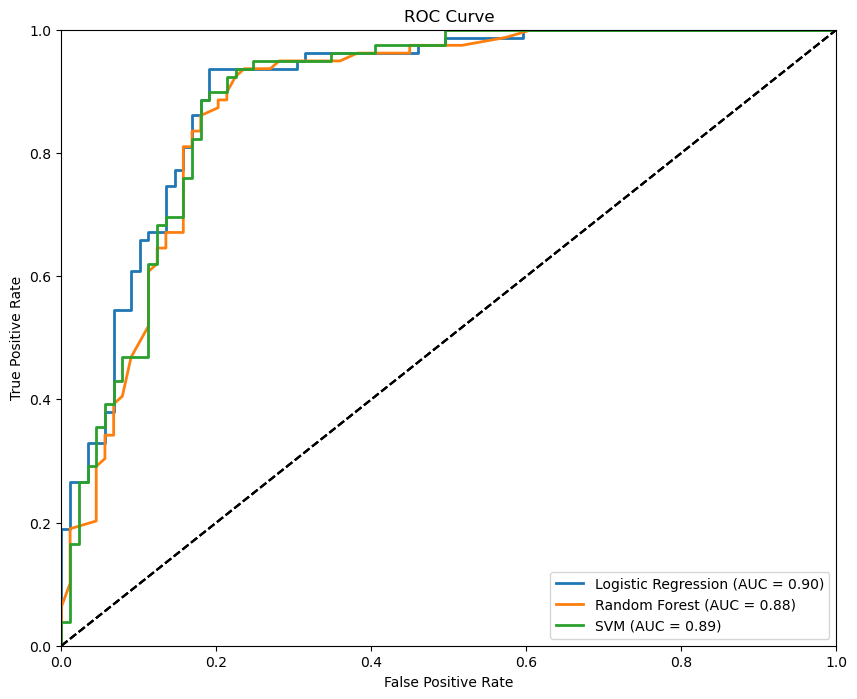

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import roc_curve, auc, accuracy_score, classification_report
import matplotlib.pyplot as plt
import numpy as np

data = pd.read_csv('C:/Users/Suhas Raghavendra R/OneDrive/Desktop/dataset/TCGA_InfoWithGrade.csv')

X = data.drop('Grade', axis=1)
y = data['Grade']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(random_state=42, probability=True)  # Ensure SVM can provide probability estimates
}

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--')  # Dashed diagonal for reference
    plt.axis([0, 1, 0, 1])
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('ROC Curve')

plt.figure(figsize=(10, 8))

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    if hasattr(model, "predict_proba"):
        y_scores = model.predict_proba(X_test_scaled)[:, 1]
    else:
        y_scores = model.decision_function(X_test_scaled)
    
    fpr, tpr, thresholds = roc_curve(y_test, y_scores)
    roc_auc = auc(fpr, tpr)
    
    plot_roc_curve(fpr, tpr, f"{name} (AUC = {roc_auc:.2f})")

plt.legend(loc="lower right")
plt.show()


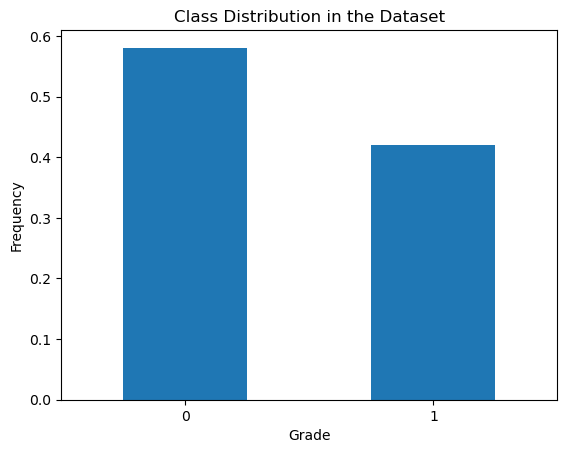

In [8]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('C:/Users/Suhas Raghavendra R/OneDrive/Desktop/dataset/TCGA_InfoWithGrade.csv')  

class_balance = data['Grade'].value_counts(normalize=True)

class_balance.plot(kind='bar')
plt.title('Class Distribution in the Dataset')
plt.xlabel('Grade')
plt.ylabel('Frequency')
plt.xticks(rotation=0)  
plt.show()

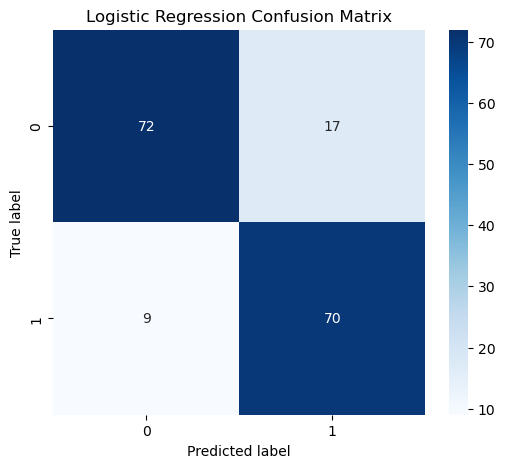

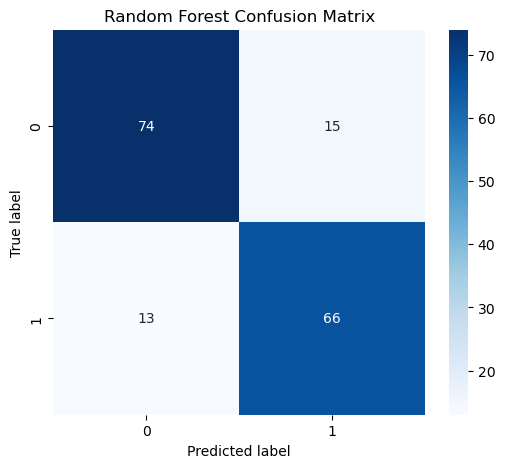

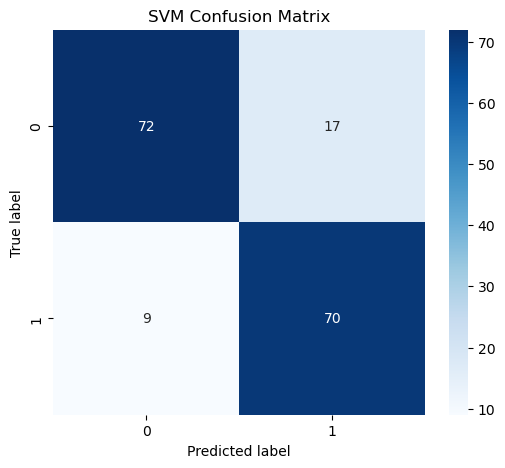

In [4]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

data = pd.read_csv('C:/Users/Suhas Raghavendra R/OneDrive/Desktop/dataset/TCGA_InfoWithGrade.csv')

X = data.drop('Grade', axis=1)
y = data['Grade']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(random_state=42) 
}

def plot_confusion_matrix(cm, title='Confusion Matrix'):
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt="d", cmap='Blues')
    plt.title(title)
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    cm = confusion_matrix(y_test, y_pred)
    plot_confusion_matrix(cm, title=f'{name} Confusion Matrix')

plt.show()


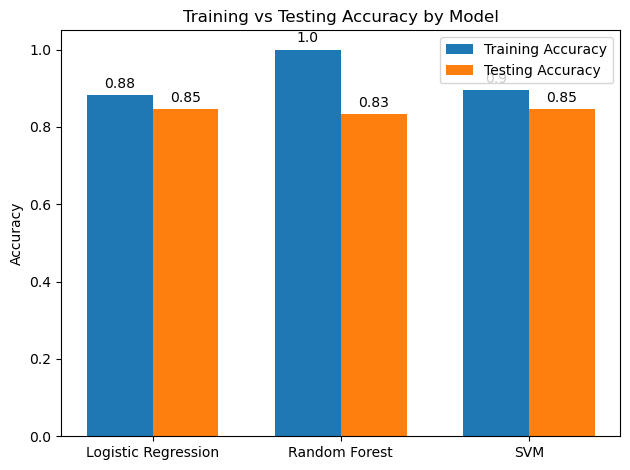

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

data = pd.read_csv('C:/Users/Suhas Raghavendra R/OneDrive/Desktop/dataset/TCGA_InfoWithGrade.csv')  

X = data.drop('Grade', axis=1)
y = data['Grade']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(random_state=42)
}

accuracies = {}

for name, model in models.items():
    model.fit(X_train_scaled, y_train)
    train_acc = accuracy_score(y_train, model.predict(X_train_scaled))
    test_acc = accuracy_score(y_test, model.predict(X_test_scaled))
    accuracies[name] = {"Training": train_acc, "Testing": test_acc}

names = list(accuracies.keys())
train_accuracies = [accuracies[name]["Training"] for name in names]
test_accuracies = [accuracies[name]["Testing"] for name in names]

x = np.arange(len(names)) 
width = 0.35 

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, train_accuracies, width, label='Training Accuracy')
rects2 = ax.bar(x + width/2, test_accuracies, width, label='Testing Accuracy')

ax.set_ylabel('Accuracy')
ax.set_title('Training vs Testing Accuracy by Model')
ax.set_xticks(x)
ax.set_xticklabels(names)
ax.legend()

def autolabel(rects):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(round(height, 2)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3), 
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)

fig.tight_layout()

plt.show()


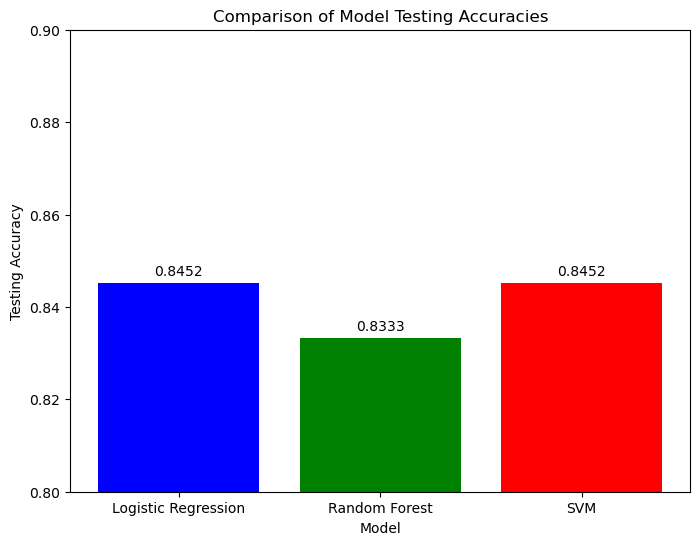

In [6]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
import matplotlib.pyplot as plt

data_path = 'C:/Users/Suhas Raghavendra R/OneDrive/Desktop/dataset/TCGA_InfoWithGrade.csv' 
data = pd.read_csv(data_path)

X = data.drop('Grade', axis=1)
y = data['Grade']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

models = {
    "Logistic Regression": LogisticRegression(random_state=42),
    "Random Forest": RandomForestClassifier(random_state=42),
    "SVM": SVC(random_state=42)
}

accuracies = []
for model in models.values():
    model.fit(X_train_scaled, y_train)
    y_pred = model.predict(X_test_scaled)
    accuracies.append(accuracy_score(y_test, y_pred))

model_names = list(models.keys())

plt.figure(figsize=(8, 6))
plt.bar(model_names, accuracies, color=['blue', 'green', 'red'])

plt.xlabel('Model')
plt.ylabel('Testing Accuracy')
plt.title('Comparison of Model Testing Accuracies')

plt.ylim(0.8, 0.9)

for i, accuracy in enumerate(accuracies):
    plt.text(i, accuracy + 0.001, f"{accuracy:.4f}", ha='center', va='bottom')

plt.show()